https://github.com/google-research/bert

In [1]:
import os
import sys

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
sys.path.append(os.path.abspath('../..'))

In [6]:
from bert import tokenization

/home/egor/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/egor/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/egor/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/egor/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWa

In [7]:
MODEL_DIR = os.path.abspath('../../bert_uncased_L-12_H-768_A-12')

In [8]:
!ls {MODEL_DIR}

bert_config.json		     bert_model.ckpt.index
bert_model.ckpt.data-00000-of-00001  vocab.txt


FROM https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/

In [9]:
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [7]:
text = "Here is the sentence I want embeddings for."
marked_text = "[CLS] " + text + " [SEP]"

# Tokenize our sentence with the BERT tokenizer.
tokenized_text = tokenizer.tokenize(marked_text)

# Print out the tokens.
print (tokenized_text)

['[CLS]', 'here', 'is', 'the', 'sentence', 'i', 'want', 'em', '##bed', '##ding', '##s', 'for', '.', '[SEP]']


In [8]:
# Define a new example sentence with multiple meanings of the word "bank"
text = "After stealing money from the bank vault, the bank robber was seen " \
       "fishing on the Mississippi river bank."

# Add the special tokens.
marked_text = "[CLS] " + text + " [SEP]"

# Split the sentence into tokens.
tokenized_text = tokenizer.tokenize(marked_text)

# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# Display the words with their indeces.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
after         2,044
stealing     11,065
money         2,769
from          2,013
the           1,996
bank          2,924
vault        11,632
,             1,010
the           1,996
bank          2,924
robber       27,307
was           2,001
seen          2,464
fishing       5,645
on            2,006
the           1,996
mississippi   5,900
river         2,314
bank          2,924
.             1,012
[SEP]           102


In [10]:
# Mark each of the 22 tokens as belonging to sentence "1".
segments_ids = [1] * len(tokenized_text)

print (segments_ids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [11]:
# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased')

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): BertLayerNorm()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): BertLayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
        (intermediate): BertIntermediate(
          (dense): Lin

In [12]:
# Predict hidden states features for each layer
with torch.no_grad():
    encoded_layers, _ = model(tokens_tensor, segments_tensors)

In [13]:
print ("Number of layers:", len(encoded_layers))
layer_i = 0

print ("Number of batches:", len(encoded_layers[layer_i]))
batch_i = 0

print ("Number of tokens:", len(encoded_layers[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(encoded_layers[layer_i][batch_i][token_i]))

Number of layers: 12
Number of batches: 1
Number of tokens: 22
Number of hidden units: 768


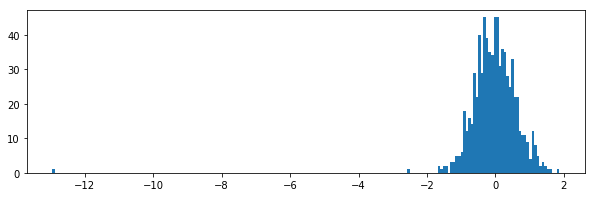

In [14]:
# For the 5th token in our sentence, select its feature values from layer 5.
token_i = 5
layer_i = 5
vec = encoded_layers[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,3))
plt.hist(vec, bins=200)
plt.show()

In [22]:
encoded_layers[-1][0].shape

torch.Size([22, 768])

In [30]:
embed = encoded_layers[-1][0].mean(0)

In [36]:
np.array(embed)

array([ 3.28727067e-02, -2.34608755e-01, -7.99242482e-02,  3.89052689e-01,
        8.87931108e-01,  2.13749602e-01, -7.80640822e-03,  6.26940608e-01,
       -3.26306000e-02, -3.47033143e-01,  1.23310499e-01, -9.47718173e-02,
       -7.44204372e-02,  4.55233961e-01, -4.72169489e-01,  1.03437662e-01,
        3.46665353e-01,  1.04095027e-01,  5.43724000e-01,  6.91130012e-02,
       -8.28798041e-02,  6.78661689e-02,  1.28705993e-01,  2.33115733e-01,
        4.29326892e-01, -1.24495002e-02, -2.13598713e-01,  2.26974905e-01,
       -1.27629027e-01,  2.80796528e-01,  5.47655642e-01, -1.00796588e-01,
        7.56504387e-02, -2.71524072e-01, -1.41239136e-01, -4.09305930e-01,
       -1.92370981e-01, -3.98125611e-02, -2.31750205e-01,  3.30400884e-01,
       -3.84840667e-01, -3.74688238e-01, -2.49777943e-01,  3.27066422e-01,
       -9.05585533e-04, -4.42851841e-01,  7.68331885e-02, -4.46174890e-02,
        1.98076665e-02,  7.46791884e-02, -3.29857558e-01,  8.21141005e-01,
       -7.62564719e-01, -

In [89]:
def get_embedding(text, tokenizer, model):
    # Add the special tokens.
    marked_text = "[CLS] " + text + " [SEP]"

    # Split the sentence into tokens.
    tokenized_text = tokenizer.tokenize(marked_text)[:511]
    # Map the token strings to their vocabulary indeces.
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    # Mark each of the 22 tokens as belonging to sentence "1".
    segments_ids = [1] * len(tokenized_text)
    
    # Convert inputs to PyTorch tensors
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensors = torch.tensor([segments_ids])

    # Predict hidden states features for each layer
    with torch.no_grad():
        encoded_layers, _ = model(tokens_tensor, segments_tensors)
    
    embed = np.array(encoded_layers[-1][0].mean(0))
    return embed

In [39]:
# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased')

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): BertLayerNorm()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): BertLayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
        (intermediate): BertIntermediate(
          (dense): Lin

In [111]:
embed = get_embedding('How are you?', tokenizer, model)

In [112]:
embed1 = get_embedding('How you are?', tokenizer, model)

/home/egor/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


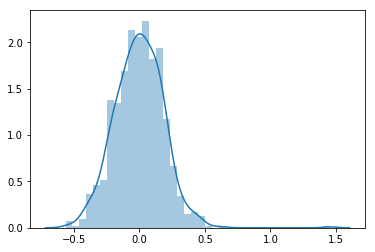

In [114]:
sns.distplot(embed-embed1)

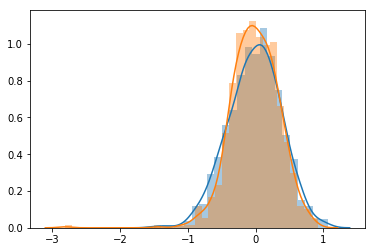

In [115]:
sns.distplot(embed)
sns.distplot(embed1)

In [10]:
DATA_DIR = os.path.abspath('../../data/stanfordSentimentTreebank/')

In [11]:
ds_split = pd.read_csv(DATA_DIR+'/datasetSplit.txt').set_index('sentence_index')

In [12]:
ds_sent_labels = pd.read_csv(DATA_DIR+'/sentiment_labels.txt', sep='|').set_index('phrase ids')

In [13]:
ds_sents = pd.read_csv(DATA_DIR+'/datasetSentences.txt', sep='\t').set_index('sentence_index')

In [14]:
from tqdm.notebook import tqdm

In [144]:
embeds = []
for s in tqdm(ds_sents['sentence'].values):
    embeds.append(get_embedding(s, tokenizer, model))

In [145]:
ds = pd.DataFrame(embeds)

In [146]:
ds.index = ds_sents.index[:len(ds)]

In [147]:
ds.to_csv(DATA_DIR+'/sent_bert_embeddings.csv')

In [18]:
ds = pd.read_csv(DATA_DIR+'/sent_bert_embeddings.csv', index_col=0)

In [20]:
ds.shape

(11855, 768)

In [153]:
ds_split['splitset_label'].value_counts()

1    8544
2    2210
3    1101
Name: splitset_label, dtype: int64

In [158]:
train_ds = ds[ds_split['splitset_label']==1]
test_ds = ds[ds_split['splitset_label']==2]
val_ds = ds[ds_split['splitset_label']==3]

In [23]:
from torchnlp.datasets import imdb_dataset

# Load the imdb training dataset
train, test = imdb_dataset(train=True, test=True)

aclImdb_v1.tar.gz: 84.1MB [06:58, 201kB/s]                               


In [25]:
len(train)

25000

In [50]:
train_ds = pd.DataFrame(train)
test_ds = pd.DataFrame(test)

In [33]:
train_ds.head()

,sentiment,text
0,pos,"Since Educating Rita, Julie Walters has been o..."
1,pos,This is one of the best movies out there and t...
2,pos,Dumland focuses on the lives of one (American?...
3,pos,At one end of the Eighties Warren Beatty creat...
4,pos,An excellent movie about two cops loving the s...


In [34]:
test_ds.head()

,sentiment,text
0,pos,"""Sweeney Todd"" is in my opinion one of a few ""..."
1,pos,"I know that to include everything in the book,..."
2,pos,It worked! Director Christian Duguay created a...
3,pos,The title refers not to a questionable poker h...
4,pos,How is it possible to like and dislike the sam...


In [70]:
embed = pd.Series(get_embedding(train_ds['text'][0], tokenizer, model))
embed.index = 'bert_'+embed.index.astype(str)

In [72]:
embed_feats = list(embed.index)

In [85]:
row['text']

'Dumland focuses on the lives of one (American?) family... The father; a violent and obscene person who loves to fart and use profanity and who has no redeeming qualities. The mother; who appears to be a paranoid psychotic, never really says much. The son; an obscure annoying repetitive little fellow. The animation is simple and crude, but does suite the stories and the characters. The episodes were originally only available from the davidlynch.com website, but have now been released on DVD. There are 8 episodes on the DVD and a brief synopsis follows:<br /><br />1- The Neighbor: We meet the next door neighbor, and find out three things about him... he has a really nice shed, he only has one arm and he likes to do naughty things with ducks.<br /><br />2- The Treadmill: We find out that the wife has an affinity for exercise, but the husband doesn\'t really think it\'s a good idea. In the end, the exercise treadmill is victorious.<br /><br />3- The Doctor: The father has an unfortunate a

In [93]:
for x in embed_feats:
    train_ds[x] = None

for ridx, row in tqdm(train_ds.iterrows(), total=len(train_ds)):
    embed = get_embedding(row['text'], tokenizer, model)
    train_ds.loc[ridx, embed_feats] = embed
train_ds.to_csv(DATA_DIR+'/imdb_train.csv')

In [95]:
train_ds.head()

,sentiment,text,bert_0,bert_1,bert_2,bert_3,bert_4,bert_5,bert_6,bert_7,...,bert_758,bert_759,bert_760,bert_761,bert_762,bert_763,bert_764,bert_765,bert_766,bert_767
0,pos,"Since Educating Rita, Julie Walters has been o...",-0.217232,-0.278537,0.0245923,-0.190077,0.338728,0.198379,0.155497,0.505957,...,-0.229349,0.110953,-0.0484041,-0.267151,-0.375385,-0.221558,0.410194,-0.0308594,0.250553,0.0608983
1,pos,This is one of the best movies out there and t...,-0.0520091,-0.275612,0.290984,0.037968,0.363718,0.0504799,0.126078,0.849306,...,-0.192496,-0.0645858,0.00871947,-0.37895,-0.302224,0.0305593,0.274638,-0.174276,0.252467,-0.049769
2,pos,Dumland focuses on the lives of one (American?...,-0.169023,-0.00588888,0.38256,-0.115467,0.296713,0.0632041,0.0517839,0.567073,...,-0.328033,0.0104621,0.170062,-0.453052,-0.0730496,-0.352005,0.217358,0.124859,0.4517,0.174639
3,pos,At one end of the Eighties Warren Beatty creat...,-0.104024,0.118619,0.313575,0.00533325,0.251248,-0.109587,-0.155153,0.548621,...,-0.314867,0.0480268,0.189538,-0.187595,-0.0315852,-0.204041,0.114504,-0.13663,0.32883,0.0359153
4,pos,An excellent movie about two cops loving the s...,-0.290859,-0.307483,0.35993,0.252686,0.42174,0.044342,0.123191,0.444648,...,0.00187467,-0.169472,0.0661618,-0.316122,-0.594344,0.0895601,0.26017,-0.23363,0.373538,0.0267218


In [94]:
for x in embed_feats:
    test_ds[x] = None

for ridx, row in tqdm(test_ds.iterrows(), total=len(test_ds)):
    embed = get_embedding(row['text'], tokenizer, model)
    test_ds.loc[ridx, embed_feats] = embed
test_ds.to_csv(DATA_DIR+'/imdb_test.csv')

KeyboardInterrupt: 

In [46]:
embed = pd.Series(get_embedding(train_ds['text'][0], tokenizer, model))
embed.index = 'bert_'+embed.index.astype(str)

In [92]:
get_embedding(row['text'], tokenizer, model)

array([-1.69022515e-01, -5.88888302e-03,  3.82559597e-01, -1.15467012e-01,
        2.96713322e-01,  6.32041320e-02,  5.17838597e-02,  5.67072988e-01,
       -6.85264319e-02, -1.18583992e-01,  2.23138630e-02, -2.05014825e-01,
       -1.63424253e-01,  2.40052760e-01, -1.35879755e-01,  7.12993860e-01,
        5.95821083e-01,  8.21804404e-02, -6.92593008e-02,  4.16816294e-01,
        8.11818838e-01, -3.45929228e-02, -5.39838821e-02,  4.33455586e-01,
        5.90316474e-01,  2.10616767e-01,  1.14611246e-01, -2.10119352e-01,
       -3.83716077e-01,  6.31121397e-02,  5.17452002e-01, -3.35183918e-01,
        1.87211305e-01, -2.17308223e-01, -9.12466639e-05, -2.35488698e-01,
        3.08433846e-02, -2.47839261e-02, -4.46884632e-02,  2.14244984e-02,
       -3.74544680e-01, -2.28441000e-01, -9.32470784e-02, -2.55511720e-02,
       -8.78452361e-02, -3.93940955e-01,  7.29438901e-01, -2.64874101e-02,
       -1.98453460e-02, -5.24623990e-02, -3.79911602e-01,  3.33532274e-01,
       -2.74176951e-02,  

In [62]:
for x in embed.index:
    train_ds[x] = None

In [67]:
train_ds.loc[0, embed.index] = embed

In [47]:
embed

bert_0     -0.217232
bert_1     -0.278537
bert_2      0.024592
bert_3     -0.190077
bert_4      0.338728
bert_5      0.198379
bert_6      0.155497
bert_7      0.505957
bert_8      0.094868
bert_9     -0.145420
bert_10     0.101992
bert_11     0.135202
bert_12     0.349203
bert_13     0.094512
bert_14    -0.153228
bert_15     0.825148
bert_16     0.834473
bert_17    -0.019554
bert_18    -0.101472
bert_19     0.102215
bert_20     0.311074
bert_21     0.015806
bert_22    -0.173801
bert_23     0.558773
bert_24     0.309150
bert_25     0.108638
bert_26    -0.004143
bert_27     0.030743
bert_28    -0.149277
bert_29     0.028250
              ...   
bert_738    0.116874
bert_739    0.443467
bert_740   -0.137052
bert_741    0.096892
bert_742   -0.100825
bert_743   -0.437084
bert_744   -0.081658
bert_745   -0.191343
bert_746   -0.475989
bert_747   -0.102189
bert_748   -0.133091
bert_749    0.111284
bert_750   -0.026696
bert_751   -0.169668
bert_752    0.334489
bert_753   -0.168952
bert_754   -0

In [27]:
len(test)

25000

In [159]:
from sklearn.linear_model import LogisticRegression

In [160]:
lr = LogisticRegression()
lr.fit_tra